In [1]:
# импортируем необходимые библиотеки
import h2o
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# импортируем класс H2OAutoML
from h2o.automl import H2OAutoML

# запускаем кластер H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
Attempting to start a local H2O server...
  Java Version: java version "15.0.2" 2021-01-19; Java(TM) SE Runtime Environment (build 15.0.2+7-27); Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from /Users/artemgruzdev/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmp0bhvngxj
  JVM stdout: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmp0bhvngxj/h2o_artemgruzdev_started_from_python.out
  JVM stderr: /var/folders/x9/w1kvj6ms0p52l8j6crt19vmh0000gn/T/tmp0bhvngxj/h2o_artemgruzdev_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_artemgruzdev_tp6nbl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [2]:
# загружаем обучающий и тестовый наборы
train = h2o.upload_file(path='Data/higgs_train_10k.csv') 
test = h2o.upload_file(path='Data/higgs_test_5k.csv') 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# задаем список предикторов и зависимую переменную
x = train.columns
y = 'response'
x.remove(y)

In [4]:
# зависимой переменной явно задаем тип enum
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [5]:
# запускаем AutoML
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220628_155558

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08085284498378055
RMSE: 0.28434634687961186
LogLoss: 0.2997882619659857
Null degrees of freedom: 9999
Residual degrees of freedom: 9981
Null deviance: 13828.113387425194
Residual deviance: 5995.765239319713
AIC: 6033.765239319713
AUC: 0.9831277878294342
AUCPR: 0.9849673662672729
Gini: 0.9662555756588684

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4849961026038807: 


,,0,1,Error,Rate
0,0,4261.0,444.0,0.0944,(444.0/4705.0)
1,1,253.0,5042.0,0.0478,(253.0/5295.0)
2,Total,4514.0,5486.0,0.0697,(697.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.484996,0.935349,207.0
1,max f2,0.399788,0.959115,237.0
2,max f0point5,0.594756,0.944419,172.0
3,max accuracy,0.497500,0.930300,203.0
4,max precision,0.991693,1.000000,0.0
5,max recall,0.169861,1.000000,333.0
6,max specificity,0.991693,1.000000,0.0
7,max absolute_mcc,0.484996,0.860431,207.0
8,max min_per_class_accuracy,0.519784,0.927949,196.0
9,max mean_per_class_accuracy,0.511238,0.929637,198.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.966906,1.888574,1.888574,1.000,0.976677,1.000000,0.976677,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.956418,1.888574,1.888574,1.000,0.961522,1.000000,0.969100,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.948329,1.888574,1.888574,1.000,0.952199,1.000000,0.963466,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.940782,1.888574,1.888574,1.000,0.944664,1.000000,0.958766,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.935568,1.888574,1.888574,1.000,0.938197,1.000000,0.954652,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.906964,1.888574,1.888574,1.000,0.920857,1.000000,0.937754,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.876166,1.888574,1.888574,1.000,0.891424,1.000000,0.922311,0.094429,0.283286,88.857413,88.857413,0.283286
7,8,0.20,0.846783,1.884797,1.887630,0.998,0.862207,0.999500,0.907285,0.094240,0.377526,88.479698,88.762984,0.377313
8,9,0.30,0.773366,1.873466,1.882908,0.992,0.811253,0.997000,0.875274,0.187347,0.564873,87.346553,88.290840,0.562960
9,10,0.40,0.685461,1.799811,1.862134,0.953,0.731385,0.986000,0.839302,0.179981,0.744854,79.981114,86.213409,0.732951




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18644561822872724
RMSE: 0.4317934902574693
LogLoss: 0.5499287297355421
Null degrees of freedom: 9999
Residual degrees of freedom: 9981
Null deviance: 13828.859365871875
Residual deviance: 10998.57459471084
AIC: 11036.57459471084
AUC: 0.7896737342689903
AUCPR: 0.8071288166157491
Gini: 0.5793474685379807

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37820202836979067: 


,,0,1,Error,Rate
0,0,2408.0,2297.0,0.4882,(2297.0/4705.0)
1,1,722.0,4573.0,0.1364,(722.0/5295.0)
2,Total,3130.0,6870.0,0.3019,(3019.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378202,0.751829,255.0
1,max f2,0.157570,0.860288,350.0
2,max f0point5,0.649120,0.738042,139.0
3,max accuracy,0.507816,0.714700,199.0
4,max precision,0.982665,1.000000,0.0
5,max recall,0.053337,1.000000,387.0
6,max specificity,0.982665,1.000000,0.0
7,max absolute_mcc,0.514835,0.427166,196.0
8,max min_per_class_accuracy,0.525144,0.712009,191.0
9,max mean_per_class_accuracy,0.514835,0.713639,196.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.948178,1.850803,1.850803,0.980,0.960652,0.980000,0.960652,0.018508,0.018508,85.080264,85.080264,0.018083
1,2,0.02,0.935667,1.794145,1.822474,0.950,0.941545,0.965000,0.951099,0.017941,0.036449,79.414542,82.247403,0.034962
2,3,0.03,0.925259,1.831917,1.825622,0.970,0.930747,0.966667,0.944315,0.018319,0.054769,83.191690,82.562166,0.052643
3,4,0.04,0.915623,1.831917,1.827195,0.970,0.920085,0.967500,0.938257,0.018319,0.073088,83.191690,82.719547,0.070325
4,5,0.05,0.907439,1.699717,1.801700,0.900,0.911893,0.954000,0.932985,0.016997,0.090085,69.971671,80.169972,0.085197
5,6,0.10,0.867091,1.684608,1.743154,0.892,0.886303,0.923000,0.909644,0.084230,0.174315,68.460812,74.315392,0.157950
6,7,0.15,0.824498,1.620397,1.702235,0.858,0.845399,0.901333,0.888229,0.081020,0.255335,62.039660,70.223481,0.223879
7,8,0.20,0.787677,1.529745,1.659112,0.810,0.805980,0.878500,0.867667,0.076487,0.331822,52.974504,65.911237,0.280175
8,9,0.30,0.703875,1.405099,1.574441,0.744,0.745537,0.833667,0.826957,0.140510,0.472332,40.509915,57.444130,0.366275
9,10,0.40,0.620948,1.191690,1.478754,0.631,0.664795,0.783000,0.786416,0.119169,0.591501,19.169027,47.875354,0.407017




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.695058,0.009285,0.700245,0.690559,0.706400,0.682090,0.696000
1,auc,0.789804,0.007853,0.777570,0.798191,0.793363,0.787304,0.792592
2,err,0.304942,0.009285,0.299756,0.309441,0.293600,0.317910,0.304000
3,err_count,609.800000,26.395075,613.000000,626.000000,601.000000,639.000000,570.000000
4,f0point5,0.693862,0.006249,0.696901,0.690145,0.702281,0.685973,0.694011
5,f1,0.753279,0.004560,0.750509,0.746764,0.756975,0.754703,0.757447
6,f2,0.823969,0.011724,0.813051,0.813503,0.820909,0.838737,0.833646
7,lift_top_group,1.816573,0.042502,1.818505,1.805686,1.811825,1.764319,1.882530
8,logloss,0.549776,0.008434,0.563379,0.541610,0.545450,0.551815,0.546628
9,max_per_class_error,0.512750,0.043768,0.476386,0.504184,0.474768,0.580541,0.527873



See the whole table with table.as_data_frame()


In [6]:
# смотрим лидерборд моделей AutoML
lb = aml.leaderboard
# печатаем все строки вместо 10 по умолчанию
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20220628_155558,0.789674,0.549929,0.807129,0.31228,0.431793,0.186446
StackedEnsemble_BestOfFamily_1_AutoML_1_20220628_155558,0.787926,0.551724,0.804767,0.322355,0.432595,0.187139
GBM_1_AutoML_1_20220628_155558,0.782194,0.557734,0.800444,0.328093,0.435367,0.189544
GBM_2_AutoML_1_20220628_155558,0.779728,0.560845,0.798186,0.328244,0.436651,0.190664
GBM_5_AutoML_1_20220628_155558,0.77877,0.561756,0.796697,0.333878,0.437108,0.191063
GBM_grid_1_AutoML_1_20220628_155558_model_2,0.777848,0.564655,0.795318,0.332602,0.438088,0.191921
GBM_3_AutoML_1_20220628_155558,0.77498,0.565286,0.794945,0.335329,0.438932,0.192661
GBM_4_AutoML_1_20220628_155558,0.769915,0.570673,0.787955,0.34518,0.441434,0.194864
XGBoost_3_AutoML_1_20220628_155558,0.769166,0.573105,0.783553,0.325881,0.442134,0.195482
XGBoost_grid_1_AutoML_1_20220628_155558_model_2,0.767801,0.581801,0.78593,0.33038,0.445473,0.198447


In [7]:
# выводим дополнительные столбцы training_time_ms 
# и predict_time_per_row_ms
lb = h2o.automl.get_leaderboard(aml, extra_columns='ALL')
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20220628_155558,0.789674,0.549929,0.807129,0.31228,0.431793,0.186446,4717,0.032771,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220628_155558,0.787926,0.551724,0.804767,0.322355,0.432595,0.187139,2114,0.019881,StackedEnsemble
GBM_1_AutoML_1_20220628_155558,0.782194,0.557734,0.800444,0.328093,0.435367,0.189544,641,0.00873,GBM
GBM_2_AutoML_1_20220628_155558,0.779728,0.560845,0.798186,0.328244,0.436651,0.190664,380,0.007559,GBM
GBM_5_AutoML_1_20220628_155558,0.77877,0.561756,0.796697,0.333878,0.437108,0.191063,409,0.00715,GBM
GBM_grid_1_AutoML_1_20220628_155558_model_2,0.777848,0.564655,0.795318,0.332602,0.438088,0.191921,332,0.007358,GBM
GBM_3_AutoML_1_20220628_155558,0.77498,0.565286,0.794945,0.335329,0.438932,0.192661,370,0.007215,GBM
GBM_4_AutoML_1_20220628_155558,0.769915,0.570673,0.787955,0.34518,0.441434,0.194864,451,0.007078,GBM
XGBoost_3_AutoML_1_20220628_155558,0.769166,0.573105,0.783553,0.325881,0.442134,0.195482,673,0.002309,XGBoost
XGBoost_grid_1_AutoML_1_20220628_155558_model_2,0.767801,0.581801,0.78593,0.33038,0.445473,0.198447,1319,0.00407,XGBoost


In [8]:
# получаем прогнозы
preds = aml.predict(test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.727538,0.272462
0,0.754832,0.245168
1,0.544422,0.455578
1,0.319891,0.680109
0,0.741932,0.258068
1,0.255611,0.744389
1,0.234863,0.765137
1,0.612528,0.387472
1,0.600721,0.399279
0,0.834065,0.165935


In [9]:
# еще можно так
preds = aml.leader.predict(test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.727538,0.272462
0,0.754832,0.245168
1,0.544422,0.455578
1,0.319891,0.680109
0,0.741932,0.258068
1,0.255611,0.744389
1,0.234863,0.765137
1,0.612528,0.387472
1,0.600721,0.399279
0,0.834065,0.165935


In [10]:
# смотрим качество модели стекинга All Models на тестовой выборке
bestmodel_perf = aml.leader.model_performance(test)
print(bestmodel_perf.auc())

0.7939985762032892


In [11]:
# получаем идентификаторы всех моделей в лидерборде
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# извлекаем модель стекинга All Models
se = h2o.get_model(
    [mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])
# извлекаем метамодель
metalearner = h2o.get_model(se.metalearner()['name'])

/Users/artemgruzdev/opt/anaconda3/lib/python3.9/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [12]:
# смотрим стандартизированные коэффициенты
metalearner.coef_norm()

{'Intercept': 0.15082902619212202,
 'GBM_1_AutoML_1_20220628_155558': 0.19926997641472557,
 'GBM_2_AutoML_1_20220628_155558': 0.16074907708265146,
 'GBM_5_AutoML_1_20220628_155558': 0.09807172962404992,
 'GBM_grid_1_AutoML_1_20220628_155558_model_2': 0.0,
 'GBM_3_AutoML_1_20220628_155558': 0.04903512218304459,
 'GBM_4_AutoML_1_20220628_155558': 0.017096238019499412,
 'XGBoost_3_AutoML_1_20220628_155558': 0.04516930371837921,
 'XGBoost_grid_1_AutoML_1_20220628_155558_model_2': 0.15693069217532737,
 'XGBoost_grid_1_AutoML_1_20220628_155558_model_3': 0.0802279157024242,
 'XRT_1_AutoML_1_20220628_155558': 0.02836522535795825,
 'DRF_1_AutoML_1_20220628_155558': 0.06288133736408479,
 'XGBoost_grid_1_AutoML_1_20220628_155558_model_1': 0.12715310209578262,
 'XGBoost_1_AutoML_1_20220628_155558': 0.10393346260205943,
 'XGBoost_2_AutoML_1_20220628_155558': 0.02614812412347114,
 'GBM_grid_1_AutoML_1_20220628_155558_model_1': 0.023838671675957882,
 'DeepLearning_grid_3_AutoML_1_20220628_155558_mode

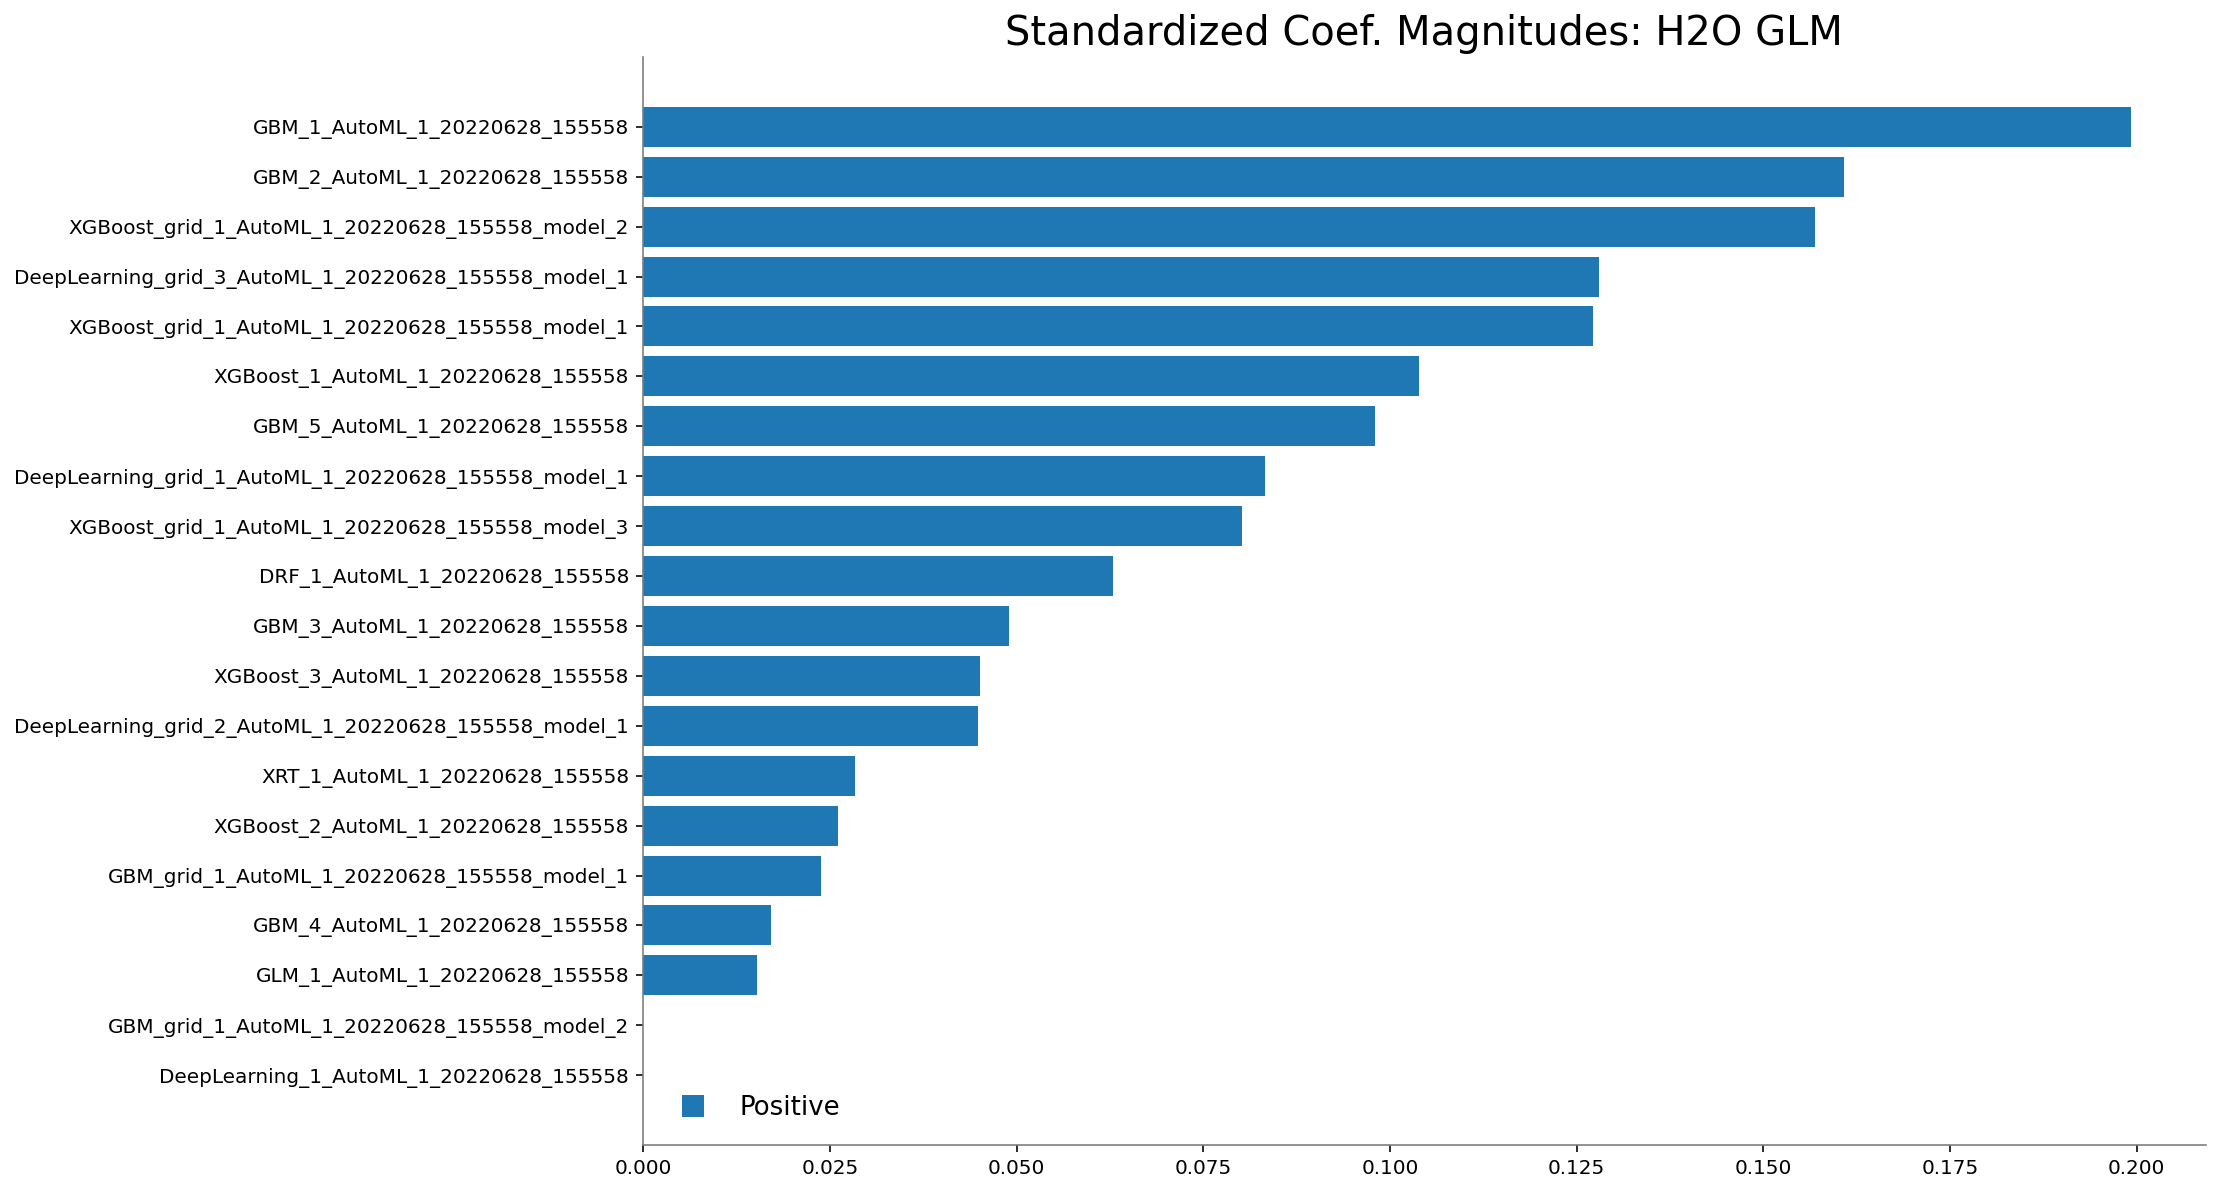

In [15]:
# визуализируем стандартизированные коэффициенты
metalearner.std_coef_plot();

In [16]:
pth = ('/Users/artemgruzdev/Documents/Github/' +
       'Data Preprocessing in Python/best_automl_model')
h2o.save_model(aml.leader, path=pth)

'/Users/artemgruzdev/Documents/GitHub/Data Preprocessing in Python/best_automl_model/StackedEnsemble_AllModels_1_AutoML_1_20220628_155558'